# Nested Experimental Designs
## Considering Levels of Treatment Factors
### Dr Austin R Brown
### School of Data Science & Analytics
### Kennesaw State University

In [17]:
import os
# 1. ENTER your GitHub username (the one that owns your fork)
#github_username = "abrown9008"

# 2. Name of the repo (don't change unless your fork name is different)
#repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
#repo_url = f"https://github.com/{github_username}/{repo_name}.git"

# --- Detect if we're already in a repo ---
#cwd = os.getcwd()
#if cwd.endswith(repo_name):
#    print(f"✅ Already inside repo folder: {cwd}")
#else:
    # --- If the repo folder exists, check if it's nested ---
#    if os.path.exists(repo_name):
#        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
#    else:
#        print(f"📥 Cloning repo from {repo_url}...")
#        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
#    if os.path.exists(repo_name):
#        os.chdir(repo_name)
#        print(f"📂 Changed directory to: {os.getcwd()}")
#    else:
#        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
#remote_url = os.popen("git config --get remote.origin.url").read().strip()

#if "abrown9008" in remote_url:
#   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
#   print("💡 Please fork the repo to your own account and update `github_username` above.")
#else:
#    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

#today_dir = "Nested and Split Plot Designs"
#os.chdir(today_dir)
#print(f"📂 Changed directory to: {os.getcwd()}")

## Introduction

- Let's consider a scenario. Suppose we work for a restaurant chain called **Jackson's Burger Joint** that specializes in smashburgers. 

- A smashburger is a type of hamburger where the beef patty is smashed onto a hot griddle to create a crispy crust. See more [here](https://www.youtube.com/watch?v=foD42-73wdI).

- Because smashburgers are cooked on a griddle, the cooking time is very short, typically around 2 minutes per side. While we want the burgers to have a crispy crust, we also don't want them to be overly dry or tough.

- Consequently, the quality of beef is an important consideration in producing a high-quality smashburger. Generally, ground beef that is 80/20 (80% lean meat, 20% fat) is considered ideal for smashburgers, as the fat content helps to create a juicy and flavorful burger, while still being lean enough to cook quickly on a griddle.

- Imagine that Jackson's has restaurants in three different states: Georgia, Alabama, and Tennessee. Restaurants in the different states source their beef from different suppliers, and the quality of beef can vary significantly between suppliers. Suppose each state has one supplier:

  - Georgia: Supplier A
  - Alabama: Supplier B
  - Tennessee: Supplier C

- To ensure that the quality of beef used in their smashburgers is consistent across all locations, Jackson's has decided to conduct an experiment to evaluate the quality of beef from different suppliers in each state.

- The suppliers provide beef to Jackson's on a weekly basis and provide the beef in 10 pound boxes. Each week, every restaurant receives 10 boxes of beef from their respective supplier.

- In this scenario, we can see that we have two potential sources of variation: the supplier (which varies by state) and the individual boxes of beef (which vary within each supplier).

- Supposing that we are interested in evaluating the fat content of the beef, we can design an experiment to measure the fat content of the beef from each supplier where we take 10 random patties out of each box and measure the fat percentage of each patty.

- But how should we structure the experiment?

## Nested Designs: Answering the Question of Levels

- In this situation, if we are using fat percentage as our outcome variable, we have two treatment factors to consider:

  1. Supplier (which varies by state)
  2. Box (which varies within each supplier)

- Since the boxes of beef are specific to the supplier, it would not be fair to compare boxes across different suppliers. For example, Box 1 from Supplier A may have a different fat content than Box 1 from Supplier B, but this difference could be due to the supplier rather than the box itself.

- In this case, we have an inherently hierarchical structure to our data. In other words, the boxes of beef are **nested** within the suppliers. This means that we cannot treat the boxes as independent observations, as they are not randomly assigned to the suppliers.

- If I were to draw a diagram of this nested structure, it would look something like this:


### Data Structure for Jackson's Burger Joint Experiment

| **Supplier** | **Box ID** | **Fat % (Outcome)** |
-------------|-----------|----------------------|
 A           | Box 1     | ?                   |
 A           | Box 2     | ?                   |
 A           | Box 3     | ?                   |
| ...         | ...         | ...       | ...                 |
 B           | Box 1     | ?                   |
 B           | Box 2     | ?                   |
 B           | Box 3     | ?                   |
| ...         | ...         | ...       | ...                 |
 C           | Box 1     | ?                   |
 C           | Box 2     | ?                   |
 C           | Box 3     | ?                   |

- As we can see, the boxes are nested within the suppliers, and we cannot compare boxes across different suppliers.

- Moreover, the differences in these specific boxes is not necessarily of interest. Thus, we can treat the boxes as a random effect in our analysis whereas the suppliers are a fixed effect.

- So how do we analyze this nested design from a statistical perspective?

### The Nested ANOVA Model 

- To analyze the nested design, we can use a nested ANOVA model. The model can be expressed as follows:

$$ y_{ijk} = \mu + \tau_i + b_{j(i)} + \epsilon_{ijk} $$

Where:

- $y_{ijk}$ is the fat percentage for the k-th observation in the j-th box from the i-th supplier.
- $\mu$ is the overall mean fat percentage.
- $\tau_i$ is the fixed effect of the i-th supplier.
- $b_{j(i)}$ is the random effect of the j-th box nested within the i-th supplier.
- $\epsilon_{ijk}$ is the random error term.

- Note, we could also have situations in which both factors are random effects, or both factors are fixed effects. The choice depends on the research question and the nature of the factors.

- In this model, our statistical hypotheses are:

- Null Hypothesis - Fixed ($H_{01}$): There is no difference in fat percentage between suppliers. ($\tau_1 = \tau_2 = \tau_3 = 0$)
- Alternative Hypothesis - Fixed ($H_{11}$): At least one supplier has a different fat percentage. (At least one $\tau_i \neq 0$)

- Null Hypothesis - Random ($H_{02}$): The variance of boxes within suppliers is zero. ($\sigma_b^2 = 0$)
- Alternative Hypothesis - Random ($H_{12}$): The variance of boxes within suppliers is greater than zero ($sigma_b^2 > 0$).

- Very similar to our mixed effects example from the last section!

- With the data contained in the `Jacksons Burgers Nested Experiment.xlsx` file, let's run through how we would perform these analyses.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Supplier    300 non-null    object 
 1   Box         300 non-null    object 
 2   Patty       300 non-null    int64  
 3   FatPercent  300 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 9.5+ KB
None
  Supplier       mean       std  count
0        A  18.774520  0.797121    100
1        B  21.957996  0.732648    100
2        C  19.652084  0.727665    100


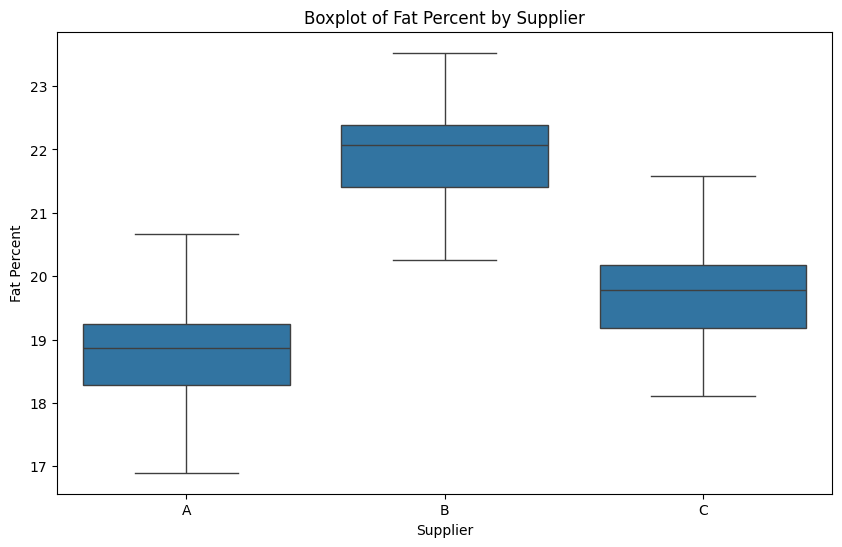

In [18]:
## Import Relevant Libraries ##
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load Burger Data ##

burgers = pd.read_excel("Jacksons Burgers Nested Experiment.xlsx")

## Examine Data Integrity ##

print(burgers.info())

## Let's summarize at the supplier level ##

supplier_stats = burgers.groupby('Supplier')['FatPercent'].agg(['mean', 'std', 'count']).reset_index()
print(supplier_stats)

## Visualize the Data using Boxplots ##
## with Seaborn ##

plt.figure(figsize=(10, 6))
sns.boxplot(x='Supplier', y='FatPercent', data=burgers)
plt.title('Boxplot of Fat Percent by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Fat Percent')
plt.show()


- Our average standard deviation by supplier is approximately 0.75. With this in mind, we can see considerable differences between suppliers with Supplier B having the greatest average fat percentage over Supplier C and A by a roughly 1.5 and 2.5 standard deviation difference, respectively.

- This is also observable in the boxplots where we see no overlap between the fat percentages across suppliers.

- Overall, this provides us strong evidence in favor of $H_{11}$.

- Now, let's take a look at the nested factor of Box within Supplier.

   Supplier    Box       mean       std  count
0         A   Box1  19.000407  0.604720     10
1         A  Box10  18.787839  0.691902     10
2         A   Box2  19.842565  0.580997     10
3         A   Box3  18.865185  0.503798     10
4         A   Box4  19.009023  0.378270     10
5         A   Box5  18.648786  0.669760     10
6         A   Box6  19.364125  0.502027     10
7         A   Box7  18.039617  0.523380     10
8         A   Box8  17.710047  0.659922     10
9         A   Box9  18.477609  0.495024     10
10        B   Box1  21.241957  0.568465     10
11        B  Box10  22.225684  0.474604     10
12        B   Box2  22.464319  0.440767     10
13        B   Box3  22.683501  0.442529     10
14        B   Box4  21.609717  0.503107     10
15        B   Box5  22.440347  0.394966     10
16        B   Box6  20.967482  0.354399     10
17        B   Box7  21.438106  0.576099     10
18        B   Box8  21.989937  0.511182     10
19        B   Box9  22.518908  0.429695     10
20        C  

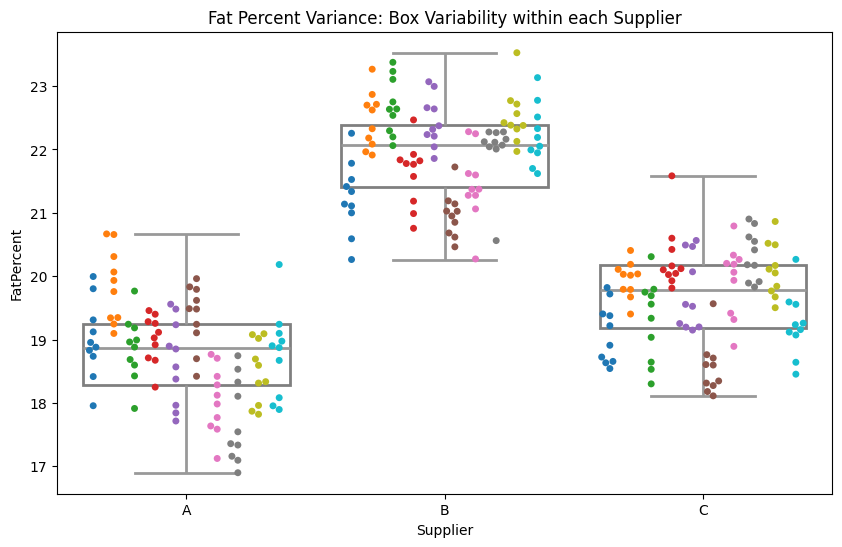

In [19]:
## Box within Supplier ##

box_data = burgers.groupby(['Supplier', 'Box'])['FatPercent'].agg(['mean','std','count']).reset_index()

print(box_data)

## Swarm + Boxplot to show Box variability within Supplier ##

plt.figure(figsize=(10, 6))
sns.swarmplot(x='Supplier', y='FatPercent', hue='Box', data=burgers, dodge=True, palette='tab10', legend=False)
sns.boxplot(x='Supplier', y='FatPercent', data=burgers, color='white', linewidth=2, showfliers=False,
            boxprops={'facecolor':'none', 'edgecolor':'black', 'alpha':0.5})
plt.title('Fat Percent Variance: Box Variability within each Supplier')
plt.show()

- Since we have so many boxes within suppliers, examining the summary statistics table is not very informative. Instead, let's look at the swarm+boxplots of fat percentage by box within each supplier.

- Here, we're looking to see if the heights of the boxes within each supplier are relatively similar or if there is considerable variation. This is similar to how we interpret the scattterplot when evaluating the constant variance assumption.

- For Supplier A, the heights of the lines are all relatively similar. For Supplier B, we can see Box8 has a cluster pattern that is considerably different (read, less variable) than the other boxes. For Supplier C, we see a similar phenomenon for Box6. 

- Since we have some evidence that not every box within each supplier has the same variance, we have some evidence in favor of $H_{12}$ (i.e., the variance of boxes within suppliers is greater than zero).

- How can we test these hypotheses statistically? Let's see!

In [20]:
import statsmodels.formula.api as smf
from scipy.stats import chi2

# --- Model Fitting ---
nested_model = smf.mixedlm(
    # Fixed effects formula: FatPercent is modeled by Supplier
    formula='FatPercent ~ Supplier', 
    data=burgers,
    # Groups: The factor that defines the random intercepts (the nested factor)
    groups=burgers['Box'], 
    # Random Effects Formula: 1 means a random intercept for each group (Box)
    re_formula='1'
)

# Fit the model
nested_results = nested_model.fit(method=["powell"], maxiter=5000,reml=False)

print(nested_results.summary())

# Fit Reduced Model
reduced_model = smf.ols(
    formula='FatPercent ~ Supplier', 
    data=burgers
)

reduced_results = reduced_model.fit()

# Likelihood Ratio Test for Box Effect 

llf_full = nested_results.llf
llf_reduced = reduced_results.llf

lr_stat = 2 * (llf_full - llf_reduced)
p_value = chi2.sf(lr_stat, df=1)  # df=1 for one additional parameter in the full model
print(f"Likelihood Ratio Test Statistic: {lr_stat:.4f}, p-value: {p_value:.4f}")



          Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: FatPercent
No. Observations:  300     Method:             ML        
No. Groups:        10      Scale:              0.4763    
Min. group size:   30      Log-Likelihood:     -323.6830 
Max. group size:   30      Converged:          Yes       
Mean group size:   30.0                                  
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     18.775    0.115 162.865 0.000 18.549 19.000
Supplier[T.B]  3.183    0.098  32.617 0.000  2.992  3.375
Supplier[T.C]  0.878    0.098   8.991 0.000  0.686  1.069
Group Var      0.085    0.067                            

Likelihood Ratio Test Statistic: 30.8816, p-value: 0.0000


- Examining the results for the fixed effect of Supplier, we can see that the p-values associated with Suppliers B and C are very small and certainly less than our typically used threshold of 0.05. Since both coefficients are also positively signed, this indicates that we have statistical evidence to suggest that the mean fat percentage for both Supplier B and C are significantly greater than that of Supplier A.

- Next, let's examine the results for the random effect of Box within Supplier using the likelihood ratio test. Here, we see that we have another very small p-value, indicating that we have statistical evidence to suggest that the variance of boxes within suppliers is significantly greater than zero.

- Looking at the estimated group variance, we can see that the estimated variance of boxes within suppliers is approximately 0.085 (standard deviation of roughly 0.29). This quantity tells us how much the average fat percentage varies between boxes from one box to the next, after accounting for the fixed differences between suppliers. In our case, in terms of the standard deviation, we can say that the average fat percentage varies by roughly 0.29 percentage points from box to box within each supplier.

## Conclusion

- In this lesson, we explored the concept of nested experimental designs using a practical example from a restaurant chain called Jackson's Burger Joint.

- We discussed how to structure a nested design when dealing with hierarchical data, where boxes of beef are nested within suppliers.

- As you likely noted, nested designs occur frequently in practice. However, analytically, they are very similar to mixed effects designs that we have discussed previously.

- In our specific example, what woud we conclude? We see that Supplier B is consistently providing our Alabama restaurants with beef that has a higher fat percentage than the other two suppliers. On the flip side, Supplier A is providing our Georgia restaurants with beef that has the lowest fat percentage.

- This may indicate a need to slightly attune the cooking times or temperatures at each location to account for these differences in fat percentage to ensure consistency in the final product.

- Regarding the boxes within each supplier, we see that there is some variability in fat percentage between boxes, but the magnitude of this variability is relatively small compared to the differences between suppliers. This suggests that while there is some variation in fat percentage between boxes, the overall quality of beef within each supplier is relatively consistent.